### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Making plots look better
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

%config InlineBackend.figure_format = 'retina'

### Laste inn datasett

##### TEK (1. Spetember til 18. Desember)

In [2]:
df_tek = pd.read_csv('vindkraft 181217 TEK met.csv',sep =';', low_memory = False)

In [5]:
#df_tek.head()

In [18]:
df_tek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Columns: 299 entries, Unnamed: 0 to SKOM-SfjHydVindhMid-T0016A3 -0120
dtypes: int64(88), object(211)
memory usage: 5.9+ MB


##### TEK (delayed 2 hours)

In [8]:
df_tek_delayed = pd.read_csv('vindkraft 181217 TEK met delayed.csv',sep =',', low_memory = False)

In [26]:
#df_tek_delayed.head()

In [10]:
df_tek_delayed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Columns: 299 entries, Time to SKOM-SfjHydVindhMid-T0016A3 -0120
dtypes: float64(281), object(18)
memory usage: 5.9+ MB


##### AROME Værdata (1. Spetember til 18. Desember)

In [11]:
df_arome = pd.read_csv('vindkraft 181217 arome.csv',sep =';', low_memory = False)

In [12]:
df_arome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Columns: 489 entries, Time to /arome_windvel_6573_1232
dtypes: float64(488), object(1)
memory usage: 9.7+ MB


## Sammenstille data til ET samlet datasett

In [14]:
df = pd.concat([df_arome,df_tek_delayed],axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Columns: 788 entries, Time to SKOM-SfjHydVindhMid-T0016A3 -0120
dtypes: float64(769), object(19)
memory usage: 15.6+ MB


In [27]:
#df.head()

#### Dropper rader med manglene verdier

In [18]:
df.dropna(inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1629 entries, 106 to 2169
Columns: 788 entries, Time to SKOM-SfjHydVindhMid-T0016A3 -0120
dtypes: float64(769), object(19)
memory usage: 9.8+ MB


#### Fjerne rader som inneholder andre datatyper

In [24]:
#df.dtypes

In [25]:
#df.columns.to_series().groupby(df.dtypes).groups

# PCA Visualisering

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(df)

ValueError: could not convert string to float: '−1'

In [90]:
scaled_data = scaler.transform(df)

In [91]:
from sklearn.decomposition import PCA

In [92]:
pca = PCA(n_components=2)

In [93]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [96]:
scaled_data.shape

(2103, 489)

In [97]:
x_pca = pca.transform(scaled_data)

ValueError: c of shape (2592,) not acceptable as a color sequence for x with size 2103, y with size 2103

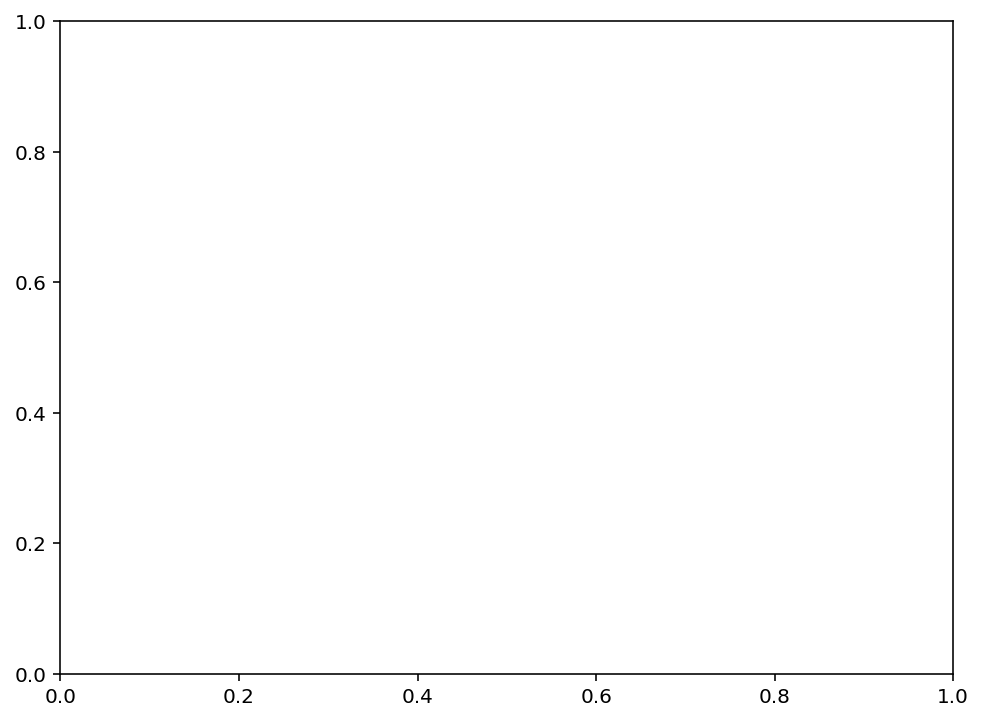

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c= df_tek['YVIK-YtreVikna1.-G1-T4015A3 -0104'], cmap= 'plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')